In [1]:
import os
import sys
import numpy as np
import pandas as pandas
import tensorflow as tf

from numpy import load
from tensorflow import keras
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential

#tf version should be 2.10.1
tf.__version__

'2.10.1'

In [2]:
# check if GPU is being used
print("GPU Status: ", end = '')
if len(tf.config.list_physical_devices('GPU')) != 0: print("Active")
else: print("Inactive")

GPU Status: Active


In [3]:
# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "Q1_images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
np.random.seed(42)

n_steps = 60
series = load('univariate-time-series-1-step.npy')

X_train, y_train = series[:9000, :n_steps], series[:9000, -1] # -1 references the last column
X_valid, y_valid = series[9000:11000, :n_steps], series[9000:11000, -1]
X_test, y_test = series[11000:, :n_steps], series[11000:, -1]


In [5]:
series.shape

(12000, 61, 1)

In [6]:
X_train.shape, y_train.shape

((9000, 60, 1), (9000, 1))

Saving figure time_series_plot


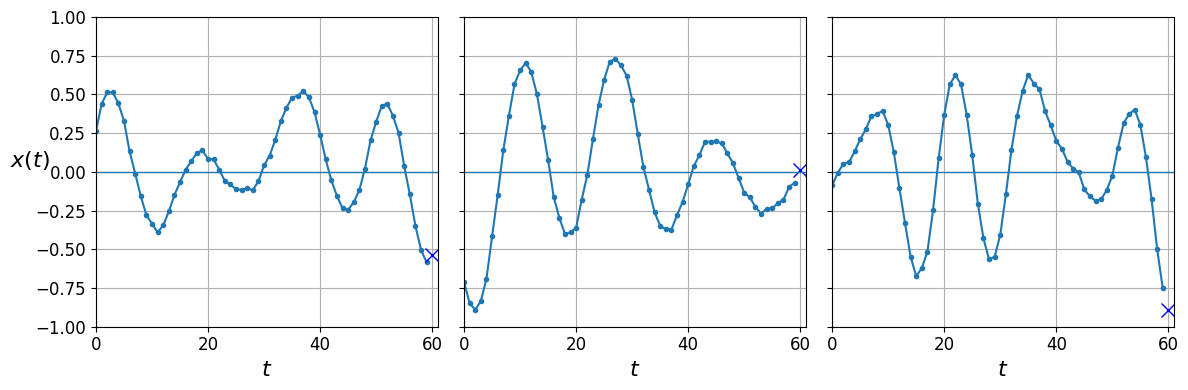

In [7]:
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))
save_fig("time_series_plot")
plt.show()

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

# RNN model
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=[60, 1]),
    tf.keras.layers.Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8)                 320       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = lstm_model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
282/282 [==============================] - 7s 8ms/step - loss: 0.0586 - val_loss: 0.0128
Epoch 2/20
282/282 [==============================] - 2s 6ms/step - loss: 0.0067 - val_loss: 0.0041
Epoch 3/20
282/282 [==============================] - 2s 6ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 4/20
282/282 [==============================] - 2s 6ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 5/20
282/282 [==============================] - 2s 5ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 6/20
282/282 [==============================] - 2s 6ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/20
282/282 [==============================] - 2s 6ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/20
282/282 [==============================] - 2s 6ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/20
282/282 [==============================] - 2s 5ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 10/20
282/282 [==============================] - 2s 5ms/step - loss: 0.0012 - val_loss: 0.0013

In [10]:
lstm_model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 3ms/step - loss: 0.0011


0.0010929469717666507

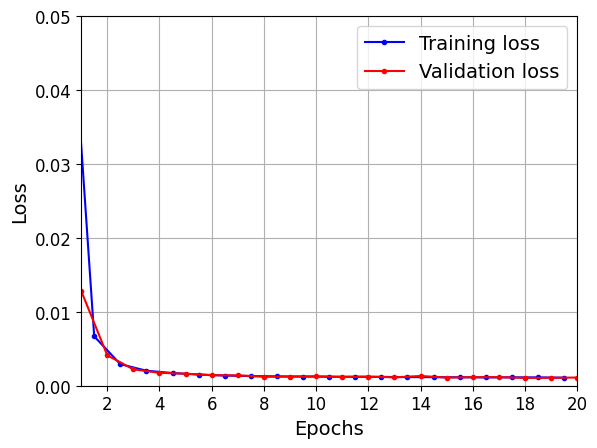

In [11]:
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [12]:
y_pred = lstm_model.predict(X_test)

32/32 [==============================] - 0s 3ms/step


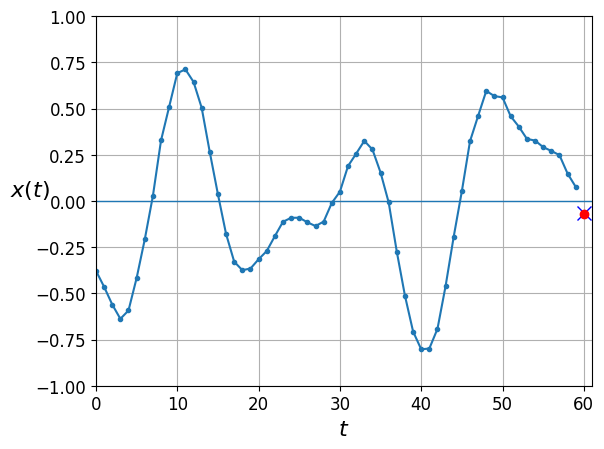

In [13]:
plot_series(X_test[15, :, 0], y_test[15, 0], y_pred[15, 0])
plt.show()